# Megbízható Mesterséges Intelligencia és Adatelemzés Házi feladat

## Adathalmat és probléma

Adatforrás: [Bannana Quality](https://www.kaggle.com/datasets/l3llff/banana?select=banana_quality.csv) dataset a Kaggle oldalról

Az adathalmaz az alábbi tulajdonságokat tartalmazza banánokról: `size` (mérete), `weight` (súlya), `sweetness` (édessége), `softness` (lágyság), `harvest time` (szüreteléstől számított idő), `ripeness` (érettsége), `aciditiy` (savassága) and the binary `quality` (minősége *Good* vagy *Bad*). Az adathalmaz 8000 sorból áll. <br>
A feladat megbecsülni az adott gyümölcs minőségét (`Good` vagy `Bad`) a numerikus oszlopok alapján.

## Profiling

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  ydata_profiling import ProfileReport

In [18]:
df = pd.read_csv('banana_quality.csv')

In [19]:
df

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
0     0.271290    Good  
1     0.307325    Good  
2     1.427322    Good  
3     0.477862    Good  
4     2.812442    Good  
...        ...     ...  
7995  2.398091     Bad  
7996  2.113136     Bad  
7997  0.697361     Bad  
7998  0.423569     Bad  
7999  1.435644     Bad  

[8000 rows x 8 columns]

In [20]:
profile = ProfileReport(df, title='Banana Quality Profiling Report', explorative=True)

In [21]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A célválzozó értékei egyenletes eloszlásúak, azaz a `Good` és `Bad` értékek száma közel azonos. Az adathalmazban nincsenek hiányzó értékek.

A profiling segítségével látszik, hogy a hét numerikus oszlop közül ötben az értékek megközelítőleg normális eloszlásúak, ezek az oszlopok a következők: `Size`, `Sweetness`, `HarvestTime`, `Ripeness` és `Acidity`. A maradék két oszlopban (`Weight` és `Softness`) érdekes jelenséget láthatunk: az eloszlásnak több csúcsa is van, ezért érdemes lehet jobban megvizsgálni.

### Weight

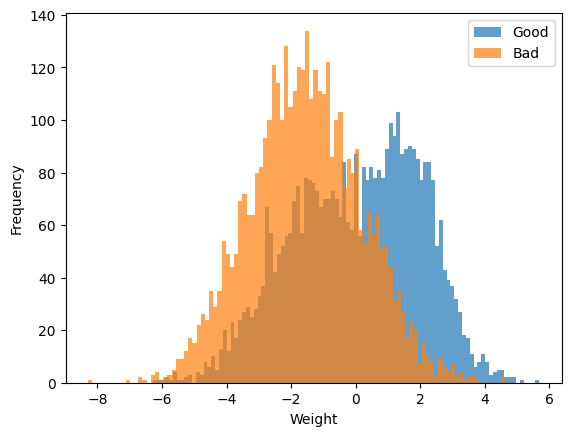

In [22]:
plt.hist(df[df['Quality']=='Good']['Weight'], bins=100, alpha=0.7)
plt.hist(df[df['Quality']=='Bad']['Weight'], bins=100, alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend(['Good', 'Bad'])
plt.show()

Ahogy látszik, a `Bad` minőségű banánok súlyának eloszlása jó közelítéssel normális, míg a `Good` minőségű banánok súlyának eloszlásában megfigyelhető az előbb említett két csúcs.

### Softness

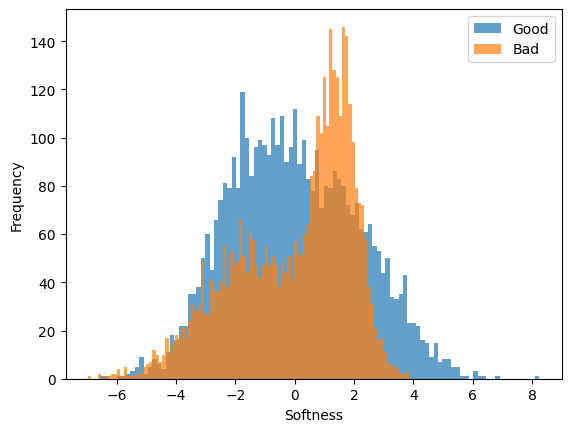

In [23]:
plt.hist(df[df['Quality']=='Good']['Softness'], bins=100, alpha=0.7)
plt.hist(df[df['Quality']=='Bad']['Softness'], bins=100, alpha=0.7)
plt.xlabel('Softness')
plt.ylabel('Frequency')
plt.legend(['Good', 'Bad'])
plt.show()

Ebben az esetben a különbség jól látható: mindkét típusnak megvan a saját, egyedi eloszlása, melyek nagyban különböznek egymástól.

A két érdekesebb eloszlású oszlopot megéri együttesen is megvizsgálni.

### Weight vs Softness

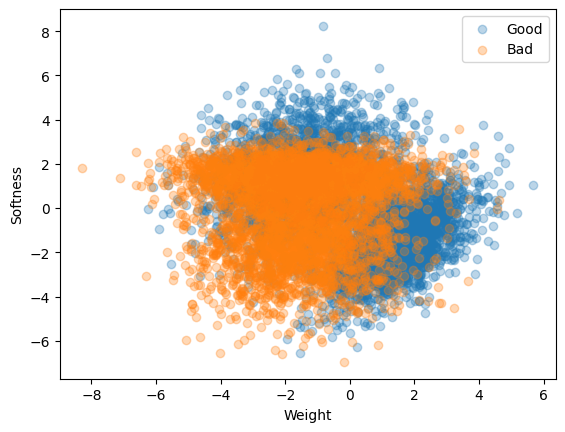

In [24]:
for qual in df['Quality'].unique():
    plt.scatter(df[df['Quality']==qual]['Weight'], df[df['Quality']==qual]['Softness'], alpha=0.3)

plt.xlabel('Weight')
plt.ylabel('Softness')
plt.legend(df['Quality'].unique())

Látszik, hogy bizonyos lágyság felett súlytól függetlenül szinte csak `Good` minőségű banánok vannak.

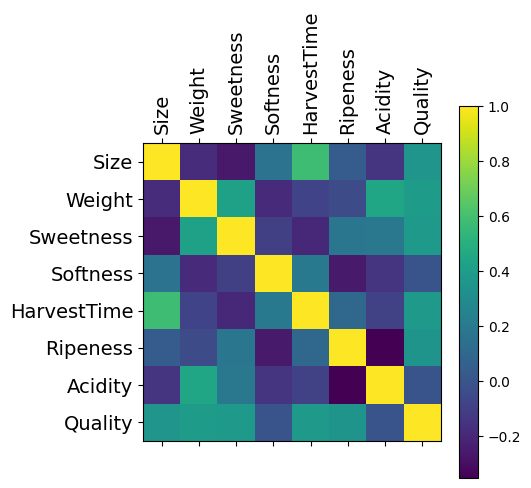

In [25]:
#mennyire összefüggőek az oszlopok (Quality-ra aplly Good = 1, Bad = 0)
df['Quality'] = df['Quality'].apply(lambda x: 1 if x == 'Good' else 0)
#heatmap with matplotlib
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
plt.colorbar()
plt.show()

In [26]:
df.corr()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
Size         1.000000 -0.181933  -0.258027  0.164526     0.582014  0.042587   
Weight      -0.181933  1.000000   0.422683 -0.189908    -0.079465 -0.035276   
Sweetness   -0.258027  0.422683   1.000000 -0.095338    -0.201657  0.180095   
Softness     0.164526 -0.189908  -0.095338  1.000000     0.194734 -0.253804   
HarvestTime  0.582014 -0.079465  -0.201657  0.194734     1.000000  0.107127   
Ripeness     0.042587 -0.035276   0.180095 -0.253804     0.107127  1.000000   
Acidity     -0.140673  0.443879   0.187059 -0.146014    -0.090903 -0.351531   
Quality      0.352983  0.388789   0.377220 -0.001637     0.376600  0.350503   

              Acidity   Quality  
Size        -0.140673  0.352983  
Weight       0.443879  0.388789  
Sweetness    0.187059  0.377220  
Softness    -0.146014 -0.001637  
HarvestTime -0.090903  0.376600  
Ripeness    -0.351531  0.350503  
Acidity      1.000000 -0.000860  
Quality     -0.000860  1.000000

A korrelációs mátrixból leolvbasható, hogy a legtöbb esetben viszonylag jelentős korreláció van az egyes leíró oszlopok és a minőség között, illetve a jellemzők oszlopai viszonylag függetlenek egymástól. <br>
Megjegyzendő, hogy van számos érdekes eset is:
- A `Size` és a `Weight` közötti korreláció értéke egy kis értékű negatív szám, hogy fordított arányosság van a két változó között, ráadásul nem is függenek egymástól.
- A `Size` és a `HarvestTime` közötti korreláció értéke relatív nagy, ami arra enged következtetni, hogy azok a banánok, amelyek szüretelésétől eltelt idő hossszabb, általában nagyobbak is.
- A `Softness` és a `Acidity` oszlopok valamint a `Quality`oszlop közötti korreláció közel zérus, ami azt jelenti, hogy a banánok ezen jellemzői nem befolyásolják azt, hogy egy banán jó vagy rossz minőségűnek számít.

Összeségében elmondható, hogy az adatkészlet alkalmas a feladat elvégésére, mivel a két osztályba tartozó elemek számossága közel azonos, illetve van érdemi korreláció a minőséggel kapcsolatban.